In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import hc_lib.plots.figlib as flib
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
path = '/home/cosinga/scratch/hcolor/output/fiducial_tng100B_099S_0A_800R/results/'
vn_f = pkl.load(open(path + 'vngrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
ssp = 'SubhaloStellarPhotometrics'
f = il.groupcat.loadSubhalos('/home/cosinga/scratch/L75n1820TNG/output/', 99, fields=['SubhaloPos', 'SubhaloMassType', 'SubhaloVel', 'SubhaloParent', ssp])

In [3]:

for s in vn_f.results['slice']:
    if s.props['space'] == 'real':
        vnreal = s
    else:
        vnred = s


In [28]:
nrows = 3
ncols = 2
def make_fig():

    xborder = 1
    yborder = 1
    panel_bt = 0.5
    panel_length = 5


    # border input can be either a list or single number
    if isinstance(xborder, float) or isinstance(xborder, int):
        xborder = [xborder, xborder]
    if isinstance(yborder, float) or isinstance(yborder, int):
        yborder = [yborder, yborder]
    if isinstance(panel_bt, float) or isinstance(panel_bt, int):
        panel_bt = [panel_bt, panel_bt]
    # creating Figure object

    figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
            xborder[0] + xborder[1]
    figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
            yborder[0] + yborder[1]

    fig = plt.figure(figsize=(figwidth, figheight), dpi = 200)

    # creating gridspec
    gs = gspec.GridSpec(nrows, ncols)
    plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
            top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
            wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

    # making panels list
    panels = []
    for i in range(nrows):
        col_panels = []
        for j in range(ncols):
            col_panels.append(fig.add_subplot(gs[i, j]))

        panels.append(col_panels)
    
    fig.text(xborder[0]/figwidth + (panel_length*2 + panel_bt[0])/2/figwidth, 0, "x (cMpc/h)", fontsize = 24, va = 'bottom', ha = 'center')

    return panels, fig

In [29]:
dim = 800
def make_vn(slice_perc):
    xslc = slice(int(dim * (1 - slice_perc)), None)
    yslc = slice(None, int(dim * slice_perc))
    panels, fig = make_fig()
    vlim = np.array([10**2, 10**10], dtype = np.float64)
    factor = 1/75**2
    vlim *= factor
    vlim = np.log10(vlim)
    norm = mpl.colors.Normalize(vmin=vlim[0], vmax=vlim[1])
    cmap_name = 'binary'
    under = 'white'
    cmap = copy.copy(mpl.cm.get_cmap(cmap_name))
    cmap.set_under(under)
    sm = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
    slices = [vnreal, vnreal, vnred, vnred]
    idxs = [(1,0), (1, 1), (2, 0), (2, 1)]

    for i in range(len(idxs)):
        rc = slices[i]
        idx = idxs[i]
        xlim, ylim, data = rc.getValues()
        data = data.copy()
        data += np.log10(factor)
        extent=(xlim[0], xlim[1], ylim[0], ylim[1])
                # x_bound, y_bound, mass = pslice.getValues()
                # extent=(x_bound[0], x_bound[1], y_bound[0], y_bound[1])
        mask = data < norm.vmin
        data[mask] = norm.vmin
        panels[idx[0]][idx[1]].imshow(data[:,:], cmap = cmap, norm = norm, aspect = 'auto', extent=extent, 
                origin='lower')
        panels[idx[0]][idx[1]].set_xlim(xlim[1] * (1 - slice_perc), xlim[1])
        panels[idx[0]][idx[1]].set_ylim(ylim[0], ylim[1] * slice_perc)
    fig.colorbar(cax = panels[0][0],mappable = sm, orientation = 'horizontal')
    fig.colorbar(cax = panels[0][1], mappable = sm, orientation = 'horizontal')

    for p in [panels[0][0], panels[0][1]]:
        p.set_aspect(1/12, anchor = 'S')
        p.tick_params(which = 'both', labelsize = 16, bottom = False, labelbottom = False, 
                      labeltop = True, top = True)

    fig.text(0.5, 0.75, "log($\\Sigma_{\\mathrm{HI}}$ M$_\\odot^{-1}$ cMpc$^{2}$ h$^{-2}$)",
             ha = 'center', va = 'top', fontsize = 22)
    plt.autoscale(False)
    tkw = {'fontsize':24, 'ha':'left', 'va':'bottom'}
    locs = [0,5,10,15,20,25,30,35]
    clabels = ['Blue Galaxies', 'Red Galaxies']
    tkw['ha'] = 'center'
    tkw['va'] = 'top'

    p = panels[0][0]

    lpad = 8
    for i in range(nrows - 1):
        for j in range(ncols):
            p = panels[i + 1][j]
            p.tick_params(direction = 'in', labelsize = 18)
    #         p.set_xticks(locs)
    #         p.set_yticks([0] + locs)
            if i == 0:
    #             if j == 0:
    #                 txtcol = 'blue'
    #             else:
    #                 txtcol = 'red'
    #             p.text(0.5, 0.95, clabels[j], transform = p.transAxes, **tkw)
                p.tick_params(labelbottom = False)
                if j == 0:
                    p.set_ylabel('y (cMpc/h)', fontsize = tkw['fontsize'], labelpad = lpad)
            if i == 1:
                if j == 0:
                    p.set_ylabel('s (cMpc/h)', fontsize = tkw['fontsize'], labelpad = lpad) 
            if not j == 0:
                p.tick_params(labelleft = False)
    return panels, fig

In [30]:
def plot_gal(real_panel, red_panel, colmask_func, color_func, size_func):
    xlim = panels[1][1].get_xlim()
    ylim = panels[1][1].get_ylim()
    xidx = 2
    yidx = 0
    zidx = 1
    stmass = f['SubhaloMassType'][:, 4] * 1e10/.6774
    resmask = stmass > 2e8
    gr = f[ssp][:, 4] - f[ssp][:, 5]
    redmask = colmask_func(gr)
    redpos = f['SubhaloPos'][:, :] / 1e3
    vel = f['SubhaloVel'][:,:]
    box = 75
    lo = box / 2 - (0.1 * box); hi = box / 2 + (0.1 * box)
    inslc = (redpos[:, zidx] > lo) & (redpos[:, zidx] < hi)
#     inX = (redpos[:,xidx] > xlim[0]) & (redpos[:, xidx] < xlim[1])
#     inY = (redpos[:, yidx] > ylim[0]) & (redpos[:, yidx] < ylim[1])
#     tot = resmask & redmask & inslc & inX & inY
    tot = resmask & redmask & inslc
    print(np.sum(tot))
    color = color_func(f['SubhaloParent'][tot])
    size = size_func(stmass[tot])
    ax = real_panel
    ax.scatter(redpos[tot, xidx], redpos[tot, yidx], color = color, s = size)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    hubble = 0.6774 * 100
    factor = 1 / hubble
    

        # handle periodic boundary conditions
    if not red_panel is None:
        ax = red_panel
        redpos[:,yidx] += vel[:,yidx]*factor
        redpos[:, yidx] = np.where((redpos[:,yidx]>box) | (redpos[:,yidx]<0), 
                (redpos[:,yidx]+box)%box, redpos[:,yidx])
        color = color_func(f['SubhaloParent'][tot])
        size = size_func(stmass[tot])
        ax.scatter(redpos[tot, xidx], redpos[tot, yidx], color = color, s = size)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return


In [31]:
def same_size(m):
    return np.ones_like(m)

def log_size(m):
    logm = np.log10(m)
    logm = (logm - np.min(logm)) / (np.max(logm) - np.min(logm))
    logm = logm * 10 + 2
    print(logm)
    return logm

from matplotlib import colors

def blue_centrals(iscen):
    colarr = np.zeros((iscen.shape[0], 3))
    satmask = iscen >= 1
    colarr[satmask, :] = colors.to_rgb('cornflowerblue')
    colarr[~satmask, :] = colors.to_rgb('blue')
    return colarr
def red_centrals(iscen):
    colarr = np.zeros((iscen.shape[0], 3))
    satmask = iscen >= 1
    colarr[satmask, :] = colors.to_rgb('coral')
    colarr[~satmask, :] = colors.to_rgb('red')
    return colarr
def red_color(iscen):
    return 'red'

def red_mask(gr):
    return gr > 0.6
def blue_color(iscen):
    return 'blue'

def blue_mask(gr):
    return gr <= 0.6

# Making a bunch of plots

In [35]:
# size_dict = {'same':same_size, 'log':log_size}
# col_dict = {'one_color':[red_color, blue_color], 'centrals':[red_centrals, blue_centrals]}
# slcp_dict = {'full':1, 'three_quarters':0.75, 'half':0.5}

# for sz in size_dict:
#     for cl in col_dict:
#         for sp in slcp_dict:
#             panels, fig = make_vn(slcp_dict[sp])
#             plot_gal(panels[0][0],panels[1][0], red_mask, col_dict[cl][0], size_dict[sz])
#             plot_gal(panels[0][1],panels[1][1], blue_mask, col_dict[cl][1], size_dict[sz])
            
# #             fig.savefig("galaxy_slices_%s_%s_%s.pdf"%(sp, cl, sz), dpi = 50)

2532
5985


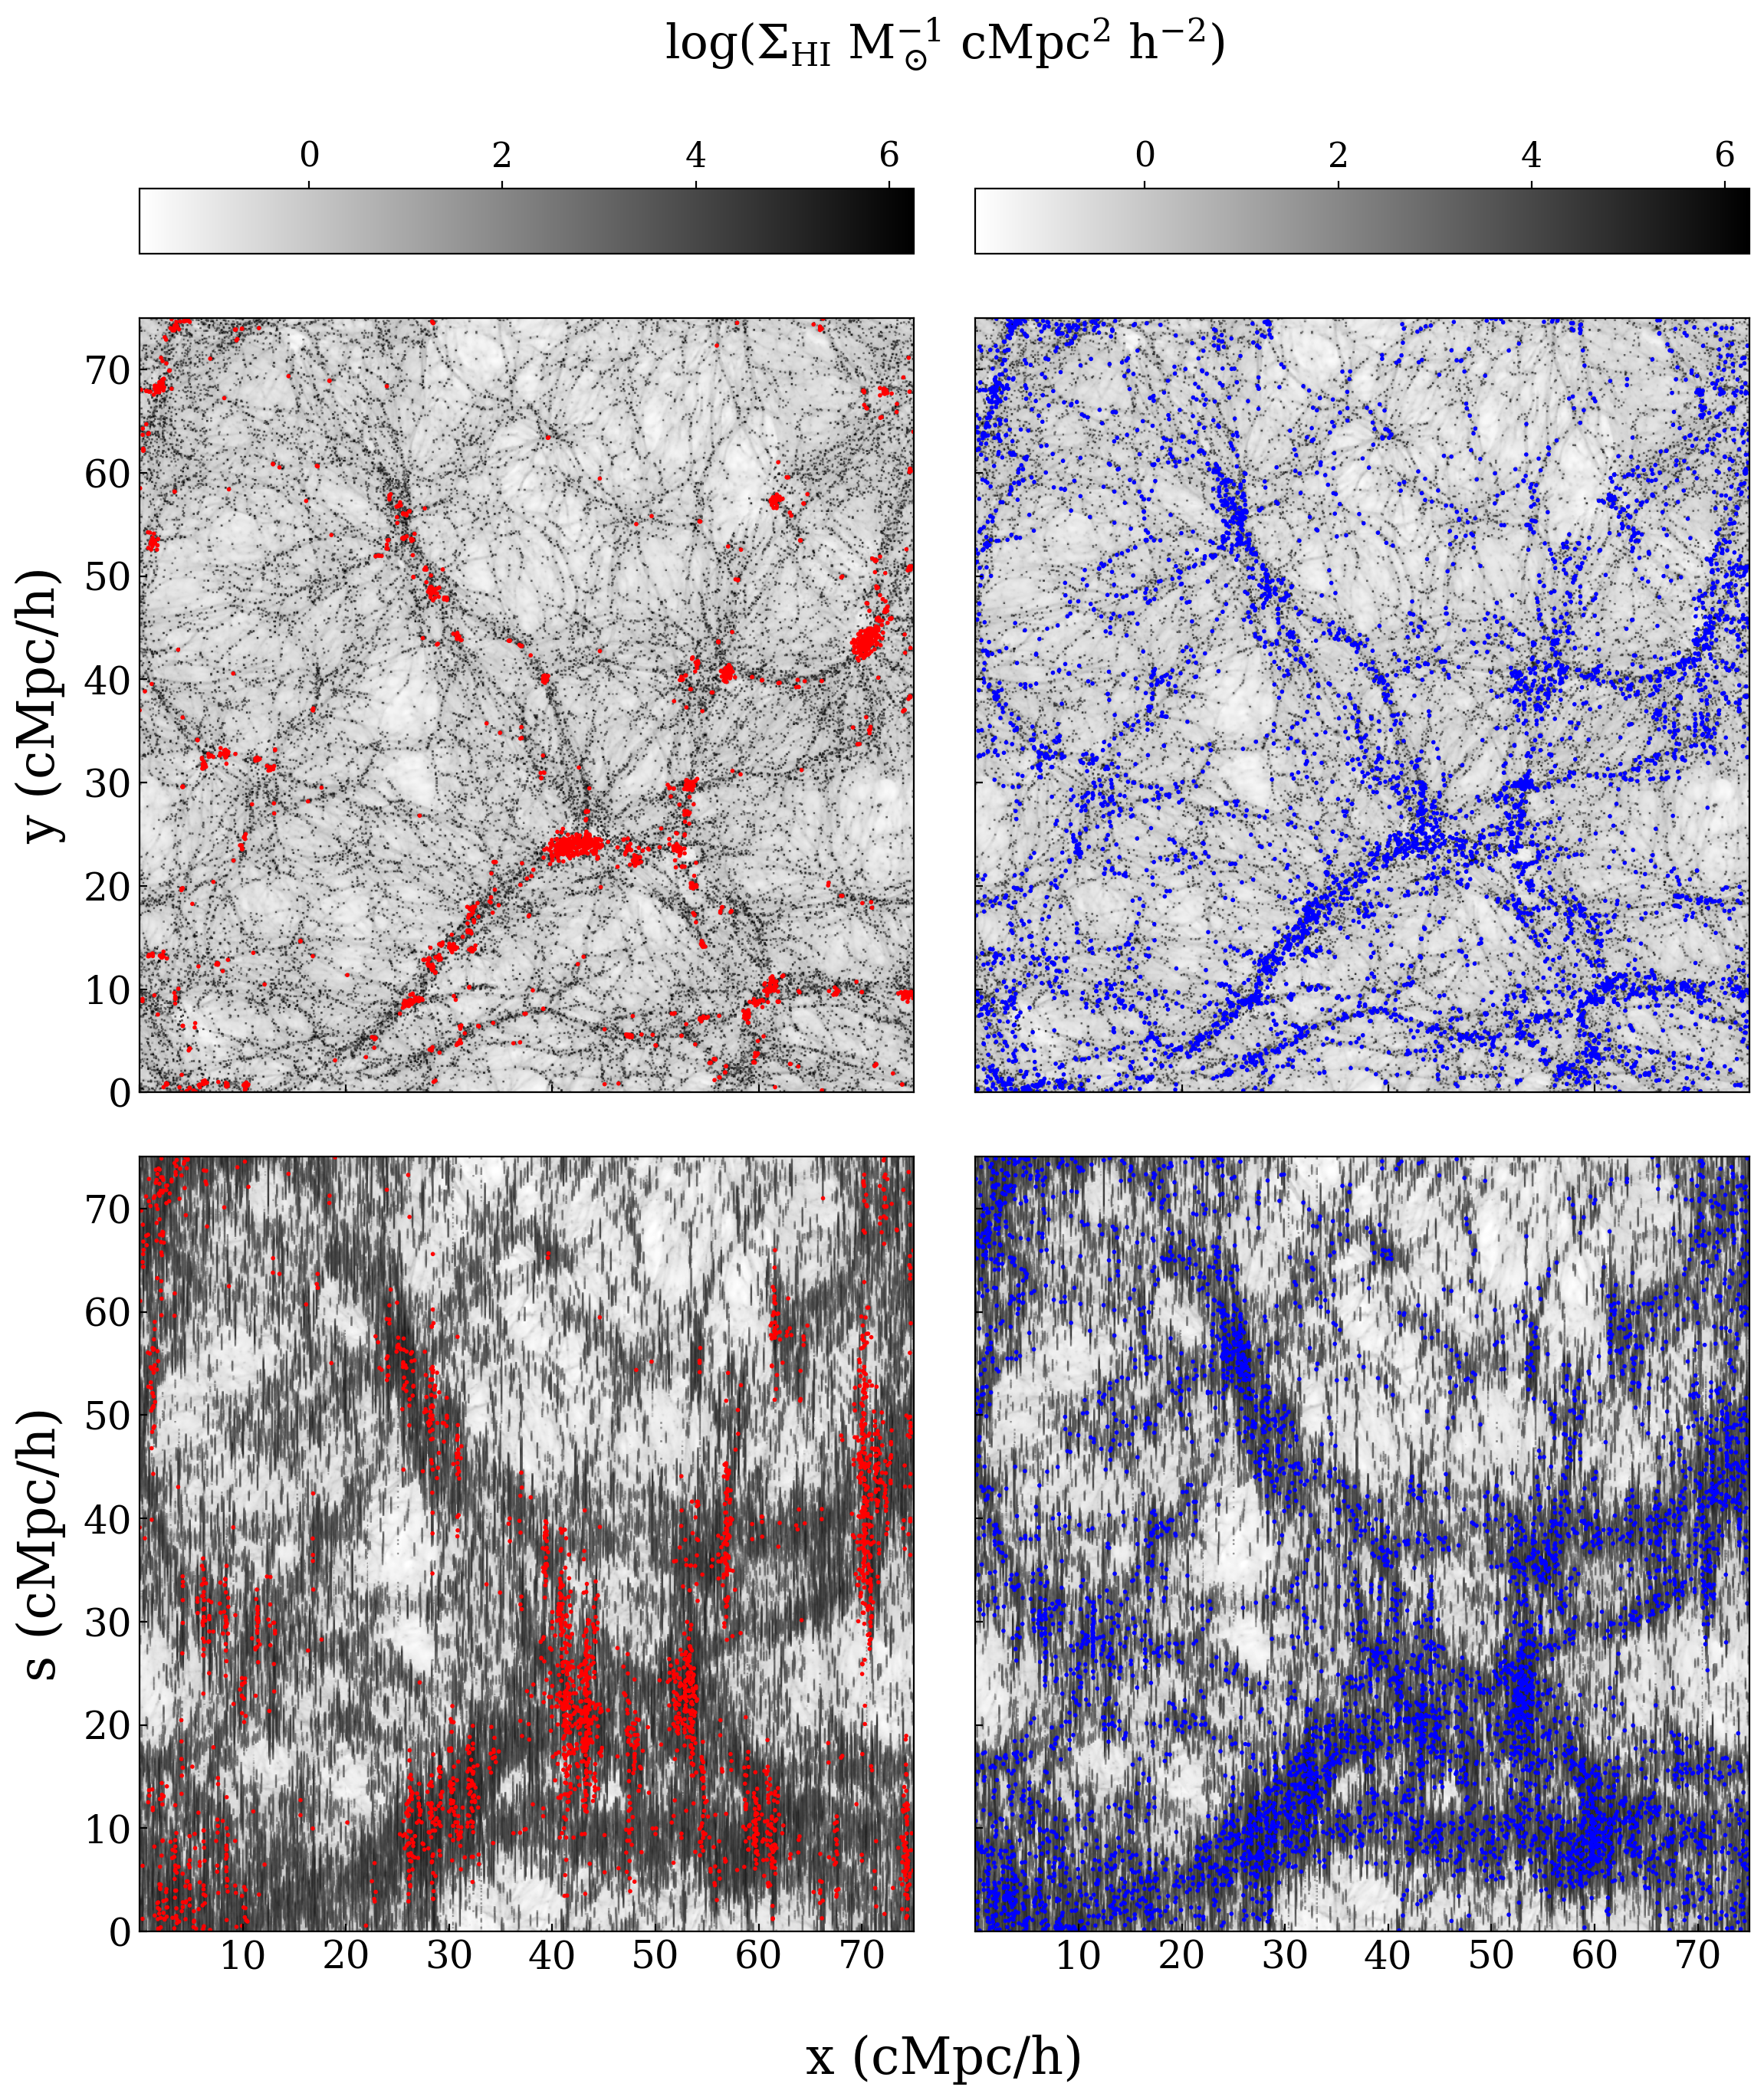

In [38]:
size_dict = {'same':same_size}
col_dict = {'one_color':[red_color, blue_color]}
slcp_dict = {'full':1}
plt.clf
for sz in size_dict:
    for cl in col_dict:
        for sp in slcp_dict:
            panels, fig = make_vn(slcp_dict[sp])
            plot_gal(panels[1][0],panels[2][0], red_mask, col_dict[cl][0], size_dict[sz])
            plot_gal(panels[1][1],panels[2][1], blue_mask, col_dict[cl][1], size_dict[sz])
            panels[-1][0].set_xticks([10, 20, 30, 40, 50, 60, 70])
            panels[-1][1].set_xticks([10, 20, 30, 40, 50, 60, 70])
            fig.savefig("galaxy_slices_%s_%s_%s_lores.pdf"%(sp, cl, sz), dpi = 75)
            fig.savefig("galaxy_slices_%s_%s_%s_hires.pdf"%(sp, cl, sz), dpi = 150)